## 모듈 불러오기 

In [1]:
import os
os.chdir('C:\\Users\\billk\\weathercontest\\data')

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
#PLOT의 변수 설정
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
#최대 출력 칼럼 수 지정
pd.set_option('display.max_columns',1000)

# 데이터 처리 및 탐색

In [5]:
file = tf.keras.utils
raw_df = pd.read_csv("merge_final_real.csv", encoding='utf-8-sig')

In [6]:
raw_df['1day_yn'] = 0.0
raw_df['2day_yn'] = 0.0

In [7]:
# 열을 밀어서 출력, 맨 첫날, 마지막 날의 경우 산사태가 발생하지 않음.
raw_df['1day_yn'][1:-1] = raw_df['landslide'][0:-2]
raw_df['2day_yn'][2:-1] = raw_df['landslide'][0:-3]

<ipython-input-7-b6da74698f00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df['1day_yn'][1:-1] = raw_df['landslide'][0:-2]
<ipython-input-7-b6da74698f00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df['2day_yn'][2:-1] = raw_df['landslide'][0:-3]


In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093790 entries, 0 to 2093789
Data columns (total 38 columns):
 #   Column      Dtype  
---  ------      -----  
 0   tm          object 
 1   stnId       int64  
 2   umd2        object 
 3   avgTa       float64
 4   minTa       float64
 5   maxTa       float64
 6   mi10MaxRn   float64
 7   hr1MaxRn    float64
 8   sumRnDur    float64
 9   sumRn       float64
 10  maxInsWs    float64
 11  maxWs       float64
 12  avgWs       float64
 13  minRhm      float64
 14  avgRhm      float64
 15  n99Rn       float64
 16  PRRCK_LARG  int64  
 17  PRRCK_MDDL  int64  
 18  LOCTN_ALTT  float64
 19  LOCTN_GRDN  float64
 20  EIGHT_AGL   float64
 21  CLZN_CD     int64  
 22  TPGRP_TPCD  int64  
 23  PRDN_FOM_C  int64  
 24  SLANT_TYP   int64  
 25  SLDPT_TPCD  int64  
 26  SCSTX_CD    int64  
 27  SLTP_CD     int64  
 28  STORUNST    float64
 29  FROR_CD     float64
 30  FRTP_CD     float64
 31  KOFTR_GROU  float64
 32  DMCLS_CD    float64
 33  AGCLS_C

# 클래스 레이블 불균형 조사

In [9]:
neg, pos = np.bincount(raw_df['1day_yn'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 2093790
    Positive: 359 (0.02% of total)



### 전체 데이터중 산사태 비중이 0.61%로 불균형이 심함을 알 수 있다.

# 데이터 정리, 분할 및 정규화

In [10]:
#분석을 위해 음수 값을 가지는 칼럼들을 제외하고 결측치를 0으로 대체한다.
select_df = raw_df[['mi10MaxRn', 'hr1MaxRn', 'sumRnDur', 'sumRn', 'maxInsWs', 'maxWs', 'avgWs','minRhm','avgRhm','n99Rn', 'PRRCK_LARG', 'PRRCK_MDDL','LOCTN_ALTT','LOCTN_GRDN','CLZN_CD','TPGRP_TPCD','PRDN_FOM_C','SLANT_TYP','SLDPT_TPCD','SCSTX_CD','SLTP_CD','STORUNST','FROR_CD','FRTP_CD','KOFTR_GROU','DMCLS_CD','AGCLS_CD','HEIGHT','1day_yn']]
cleaned_df = select_df.fillna(0)
cleaned_df.info()
cleaned_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093790 entries, 0 to 2093789
Data columns (total 29 columns):
 #   Column      Dtype  
---  ------      -----  
 0   mi10MaxRn   float64
 1   hr1MaxRn    float64
 2   sumRnDur    float64
 3   sumRn       float64
 4   maxInsWs    float64
 5   maxWs       float64
 6   avgWs       float64
 7   minRhm      float64
 8   avgRhm      float64
 9   n99Rn       float64
 10  PRRCK_LARG  int64  
 11  PRRCK_MDDL  int64  
 12  LOCTN_ALTT  float64
 13  LOCTN_GRDN  float64
 14  CLZN_CD     int64  
 15  TPGRP_TPCD  int64  
 16  PRDN_FOM_C  int64  
 17  SLANT_TYP   int64  
 18  SLDPT_TPCD  int64  
 19  SCSTX_CD    int64  
 20  SLTP_CD     int64  
 21  STORUNST    float64
 22  FROR_CD     float64
 23  FRTP_CD     float64
 24  KOFTR_GROU  float64
 25  DMCLS_CD    float64
 26  AGCLS_CD    float64
 27  HEIGHT      float64
 28  1day_yn     float64
dtypes: float64(20), int64(9)
memory usage: 463.3 MB


,mi10MaxRn,hr1MaxRn,sumRnDur,sumRn,maxInsWs,maxWs,avgWs,minRhm,avgRhm,n99Rn,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,HEIGHT,1day_yn
0,0.0,0.0,19.33,28.0,29.4,19.0,11.1,65.0,82.5,5.8,0,0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0
1,0.0,0.0,22.83,24.8,14.5,8.5,6.0,65.0,91.5,29.7,0,0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0
2,0.0,0.0,12.83,7.5,15.9,10.2,6.5,61.0,80.3,0.3,0,0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0
3,0.0,0.0,0.00,0.0,11.2,6.8,3.1,53.0,63.1,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0
4,0.0,0.0,7.25,1.8,13.9,6.9,4.1,42.0,61.5,12.3,0,0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0


In [11]:
duplicate_columns = cleaned_df.columns[cleaned_df.columns.duplicated()]
duplicate_columns

Index([], dtype='object')

In [12]:
#y = cleaned_df['1day_yn']
#X = cleaned_df.drop('1day_yn', axis =1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)
# print(X_train.shape, X_test.shape)

In [13]:
#from imblearn.under_sampling import RandomUnderSampler
# 1: 50 비율
#X_samp, y_samp = RandomUnderSampler(random_state=1024,  sampling_strategy={1: 359, 0: 17950}).fit_resample(X, y)
#X_df = pd.DataFrame(X_samp)
#y_df = pd.DataFrame(y_samp)

#df_samp = pd.concat([X_df, y_df], axis=1)

In [14]:
# 데이터 스플릿, 셔플링
train_df, test_df = train_test_split(cleaned_df, test_size=0.25)
train_df, val_df = train_test_split(train_df, test_size=0.25)

#label(변수들), feature(landslide)를 np array 형태로 변환
train_labels = np.array(train_df.pop('1day_yn'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('1day_yn'))
test_labels = np.array(test_df.pop('1day_yn'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [15]:
# sklearn StandardScaler를 사용하여 입력 기능을 정규화
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (1177756,)
Validation labels shape: (392586,)
Test labels shape: (523448,)
Training features shape: (1177756, 28)
Validation features shape: (392586, 28)
Test features shape: (523448, 28)


# 데이터 분포 살펴보기 - 정규화 후 살펴봄
# 평균 : 0, 표준편차 : 1
# 살펴볼 변수로는 avgWs, avgRhm 두 변수를 살펴봄

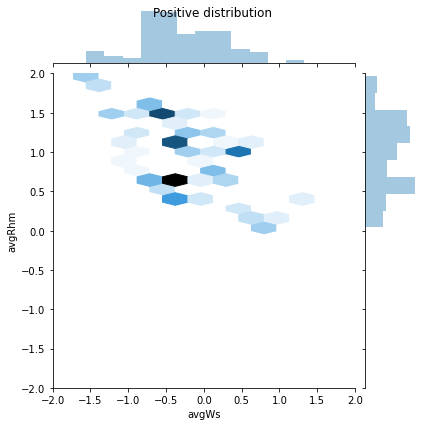

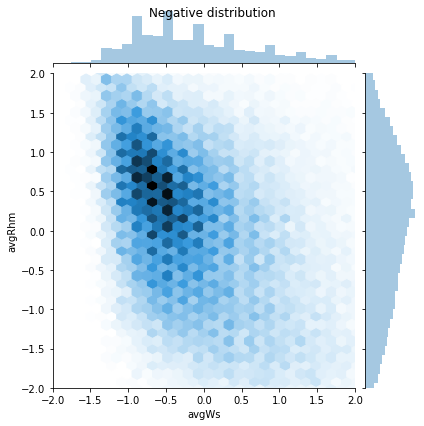

In [16]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

sns.jointplot(pos_df['avgWs'], pos_df['avgRhm'],
              kind='hex', xlim=(-2,2), ylim=(-2,2))
plt.suptitle("Positive distribution")

sns.jointplot(neg_df['avgWs'], neg_df['avgRhm'],
              kind='hex', xlim=(-2,2), ylim=(-2,2))
_ = plt.suptitle("Negative distribution")

### 유용한 메트릭 이해

위에서 정의한 몇 가지 지표는 성능을 평가할 때 도움이 될 모델에 의해 계산될 수 있다는 점에 유의하십시오. 



*   **거짓** 음성 그리고 **거짓** 양성은 **잘못** 분류된 샘플입니다.
*   **참** 음성 그리고 **참** 양성은 **제대로** 분류된 샘플입니다.
*   **정확도** 는 올바르게 분류된 예제의 비율입니다.
>   $\frac{\text{true samples}}{\text{total samples}}$
*   **정밀도** 는 올바르게 분류된 **예측** 긍정 비율입니다.
>   $\frac{\text{true positives}}{\text{true positives + false positives}}$
*   **재현 율** 은 올바르게 분류된 **실제** 긍정 비율입니다.
>   $\frac{\text{true positives}}{\text{true positives + false negatives}}$
*   **AUC** 는 수신자 조작 특성 곡선 아래 영역(ROC-AUC)을 나타냅니다. 이 메트릭은 분류기가 무작위 음성 샘플보다 무작위 양성 샘플의 순위를 매길 확률과 동일합니다. 

## 참고: 정확도는 이 작업에 유용한 측정 항목이 아닙니다. 항상 False를 예측해야 이 작업에서 99.8% 이상의 정확도를 얻을 수 있습니다.

Read more:
*  [참 vs. 거짓 and 긍정 vs. 부정](https://developers.google.com/machine-learning/crash-course/classification/true-false-positive-negative)
*  [정확성](https://developers.google.com/machine-learning/crash-course/classification/accuracy)
*   [정밀도와 재현율](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall)
*   [ROC-AUC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

# 모델 및 메트릭 정의
히든레이어, 과적합 방지를 위한 drop out 레이어, 2진 분할을 가능성을 출력하는 sigmoid 레이어로 간단한 신경망을 생성하는 함수를 정의한다.

In [17]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential(
      [
      keras.layers.Dense(
          256, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

# 기준 모델 - 모델 구축 - 아직 불균형 해결 x

In [18]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [19]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               7424      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 7,681
Trainable params: 7,681
Non-trainable params: 0
_________________________________________________________________


c:\users\billk\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [20]:
model.predict(train_features[:10])

array([[0.7885225 ],
       [0.7054994 ],
       [0.7726562 ],
       [0.81845105],
       [0.78002167],
       [0.6801559 ],
       [0.8343531 ],
       [0.7945337 ],
       [0.75836486],
       [0.7427086 ]], dtype=float32)

# 선택사항 : 올바른 초기 바이어스 설정
우리는 데이터 세트가 불균형 하다는 것을 알고 있다. 따라서 이를 반영하도록 출력 계층의 바이어스를 설정이는 초기 수렴에 도움을 준다.

기본 바이어스 초기화를 사용하면 손실은 약 `math.log(2) = 0.69314` 

In [21]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 1.4087


설정할 올바른 바이어스는 다음에서 파생 가능합니다.:

$$ p_0 = pos/(pos + neg) = 1/(1+e^{-b_0}) $$
$$ b_0 = -log_e(1/p_0 - 1) $$
$$ b_0 = log_e(pos/neg)$$

In [22]:
#pos, neg는 위에서 이미 정의함
initial_bias = np.log([pos/neg])
initial_bias

array([-8.67099252])

In [23]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[1.3914704e-04],
       [1.2671947e-04],
       [1.6567111e-04],
       [1.2481213e-04],
       [1.3628602e-04],
       [8.9656343e-05],
       [8.1366277e-05],
       [1.7330050e-04],
       [1.3586879e-04],
       [1.1816209e-04]], dtype=float32)

In [24]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.0017


#위와 같이 초기화를 통해서 초기 손실을 극단적으로 낮출 수 있다. 이는 초기 예측 가능서이 낮다는 것을 알게 해주고 추후 epoch을 보낼 필요가 없다는 것을 알게 됩니다. 또한 훈련 과정 중 손실을 더 쉽게 나타내 줍니다.

# 초기 가중치 체크 포인트

In [25]:
#가중치 비교를 위한 저장
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

## 바이어스 최기화 비교

In [26]:
#바이어스 초기화 x 모델
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [27]:
#바이어스 초기화 O 모델
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [28]:
def plot_loss(history, label, n):
  # Use a log scale to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train '+label)
  plt.semilogy(history.epoch, history.history['val_loss'],
          color=colors[n], label='Val '+label,
          linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  
  plt.legend()

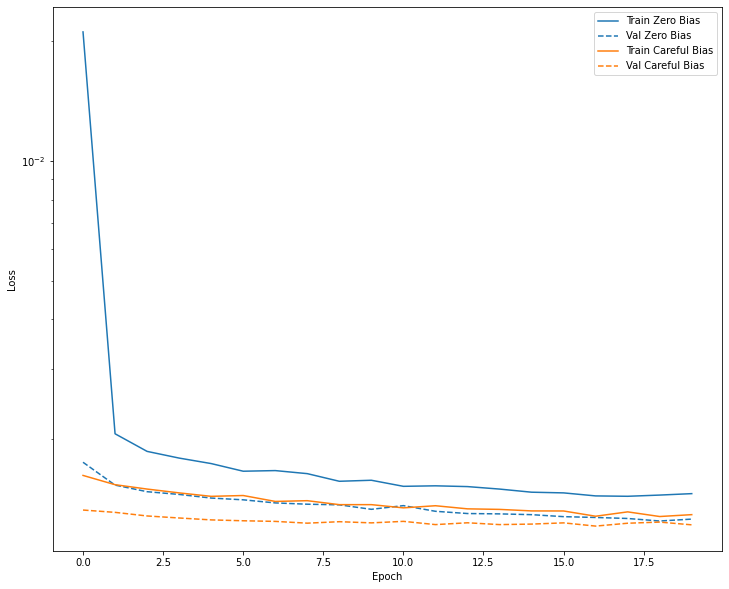

In [29]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

위의 그림을 통해 바이어스 초기화가 효과적이라는 것을 알았고, 이는 바이어스 최기화의 장점을 잘 보여준다.

# 모델 훈련

In [30]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
576/576 [==============================] - 10s 15ms/step - loss: 0.0016 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1570073.0000 - fn: 269.0000 - accuracy: 0.9998 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5275 - val_loss: 0.0013 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 392527.0000 - val_fn: 59.0000 - val_accuracy: 0.9998 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5084
Epoch 2/100
576/576 [==============================] - 7s 13ms/step - loss: 0.0016 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1177546.0000 - fn: 210.0000 - accuracy: 0.9998 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5304 - val_loss: 0.0013 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 392527.0000 - val_fn: 59.0000 - val_accuracy: 0.9998 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5252
Epoch 3/100
576/576 [==============================] - 8s 13ms/step - loss: 0.0015 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1177546.0000 - fn: 210.0000 

## 학습 이력 확인

In [31]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()


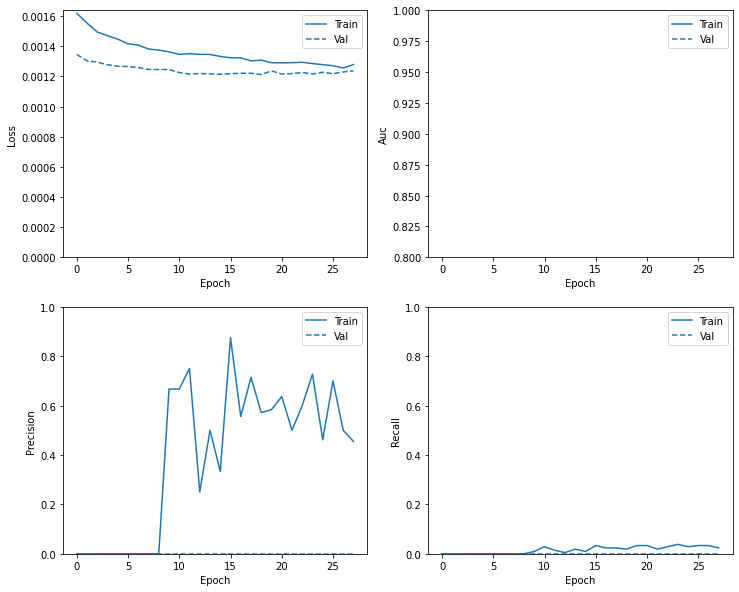

In [32]:
plot_metrics(baseline_history)

위 그래프를 보니 precision, recall 0이 나왔는데 이는 true positive, 즉 진짜 산사태가 일어난 1인 곳을 잘 예측한게 하나도 없다. 즉 제대로 예측이 이루어지지 않았음을 알 수 있다.

## 매트릭 평가

In [33]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [34]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  0.0014838164206594229
tp :  0.0
fp :  0.0
tn :  523358.0
fn :  90.0
accuracy :  0.999828040599823
precision :  0.0
recall :  0.0
auc :  0.5607839822769165

Legitimate Transactions Detected (True Negatives):  523358
Legitimate Transactions Incorrectly Detected (False Positives):  0
Fraudulent Transactions Missed (False Negatives):  90
Fraudulent Transactions Detected (True Positives):  0
Total Fraudulent Transactions:  90


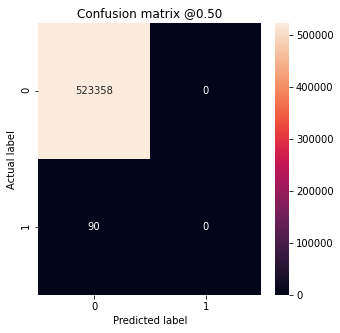

In [35]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

위의 그림으로 볼 때 실제 예측이 잘 이루어지지 않았음을 알 수 있다.

## ROC 그래프

In [36]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

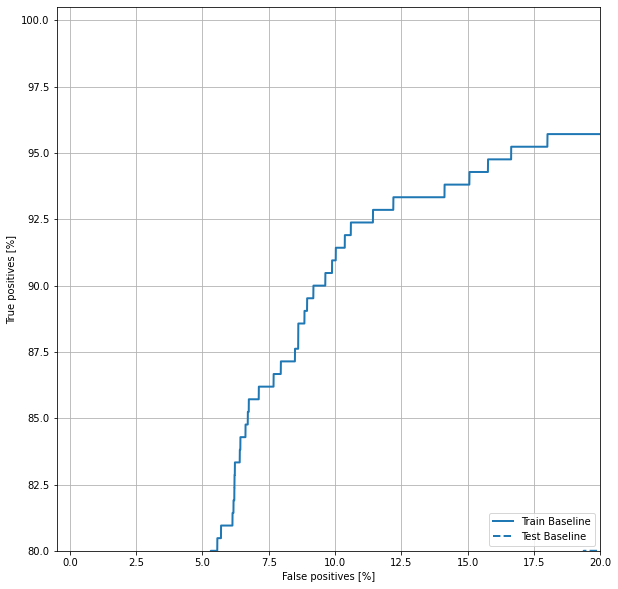

In [37]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

밑 면적이 제법 높게 나오지만 이는 0을 0으로 분류한 결과 때문이지 잘 예측했다고는 볼 수 없다.

# 클래스 가중치

## 클래스 가중치 계산

In [38]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
#neg : 산사태가 발생하지 않을 확률(0)
#pos : 산사태가 발생할 확률(1)
weight_for_0 = (1 / neg)*(total)/1.0 
weight_for_1 = (1 / pos)*(total)/1.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.00
Weight for class 1: 5832.28


## 클래스 가중치로 모델 교육

참고: `class_weights` 를 사용하면 손실 범위가 바뀝니다. 이는 최적기에 따라 학습의 안정성에 영향을 미칠 수 있습니다. 단계 크기가 그라데이션의 크기에 따라 달라지는 `optimizers.SGD` 와 같은 최적화 도구는 실패할 수 있습니다. 여기서 사용되는 최적화기인 `optimizers.Adam` 은 스케일링 변화에 영향을 받지 않습니다. 또한 가중치 때문에 전체 손실은 두 모델 간에 비교할 수 없습니다. 

In [39]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


c:\users\billk\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
576/576 [==============================] - 11s 17ms/step - loss: 3.9047 - tp: 69.0000 - fp: 115017.0000 - tn: 1585887.0000 - fn: 231.0000 - accuracy: 0.9323 - precision: 5.9955e-04 - recall: 0.2300 - auc: 0.6320 - val_loss: 0.5687 - val_tp: 39.0000 - val_fp: 81262.0000 - val_tn: 311265.0000 - val_fn: 20.0000 - val_accuracy: 0.7930 - val_precision: 4.7970e-04 - val_recall: 0.6610 - val_auc: 0.8303
Epoch 2/100
576/576 [==============================] - 8s 15ms/step - loss: 1.2281 - tp: 151.0000 - fp: 279204.0000 - tn: 898342.0000 - fn: 59.0000 - accuracy: 0.7629 - precision: 5.4053e-04 - recall: 0.7190 - auc: 0.8248 - val_loss: 0.4588 - val_tp: 44.0000 - val_fp: 79882.0000 - val_tn: 312645.0000 - val_fn: 15.0000 - val_accuracy: 0.7965 - val_precision: 5.5051e-04 - val_recall: 0.7458 - val_auc: 0.8554
Epoch 3/100
576/576 [==============================] - 8s 14ms/step - loss: 1.0960 - tp: 156.0000 - fp: 277101.0000 - tn: 900445.0000 - fn: 54.0000 - accuracy: 0.7647 - precision

### 학습 이력 조회

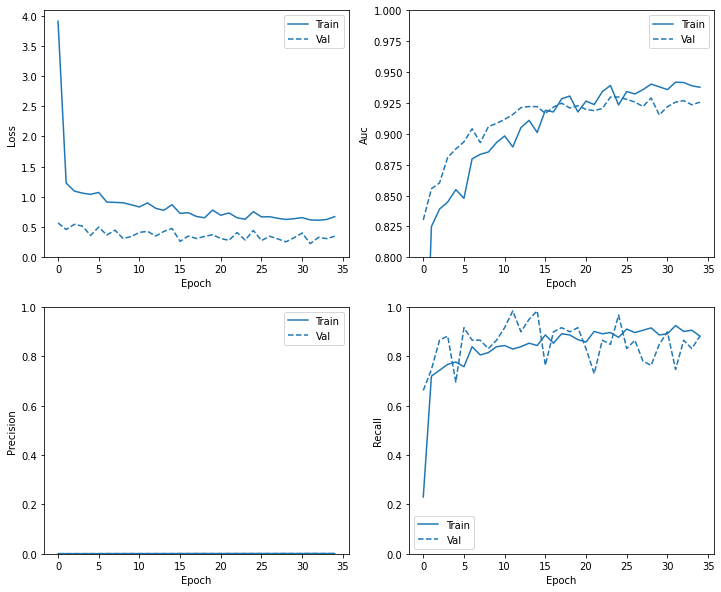

In [43]:
plot_metrics(weighted_history)

In [44]:
#가중치 2.0 기준으로 학습시
loss :  0.1835394948720932
tp :  53.0
fp :  844.0
tn :  19536.0
fn :  5.0
accuracy :  0.958459734916687
precision :  0.05908584222197533
recall :  0.9137930870056152
auc :  0.9873133897781372
#가중치 1.0으로 학습시 - 종전보다 오히려 소폭 하락한 AUC 결과값이 나온다.
loss :  0.18933920562267303
tp :  53.0
fp :  878.0
tn :  19502.0
fn :  5.0
accuracy :  0.9567961692810059
precision :  0.056928034871816635
recall :  0.9137930870056152
auc :  0.9869509339332581

In [45]:
그래도 의미가 있는 그래프가 도출되었다. recall 값이 90프로 이상이 나왔다.

SyntaxError: invalid syntax (<ipython-input-45-ed8576cdfe54>, line 1)

### 매트릭 평가

In [46]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.4465116560459137
tp :  71.0
fp :  102695.0
tn :  420663.0
fn :  19.0
accuracy :  0.8037741780281067
precision :  0.00069089001044631
recall :  0.7888888716697693
auc :  0.8845693469047546

Legitimate Transactions Detected (True Negatives):  420663
Legitimate Transactions Incorrectly Detected (False Positives):  102695
Fraudulent Transactions Missed (False Negatives):  19
Fraudulent Transactions Detected (True Positives):  71
Total Fraudulent Transactions:  90


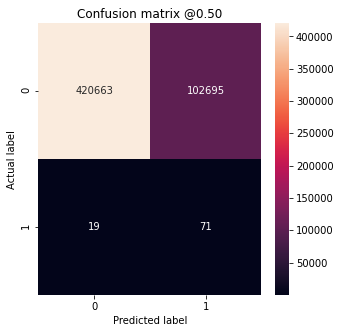

In [47]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

비록 정확도가 낮음에도 이 모델의 결과는 리콜이 더 높게 나왔다. 즉 더 잘 산사태를 식별했음을 의미한다. 가중치를 줌으로써 산사태 식별 리콜 값이 올라갔다. 하지만 너무 과한 가중치는 정확도를 낮추기 때문에 주의할 필요가 있다.

### ROC 그래프

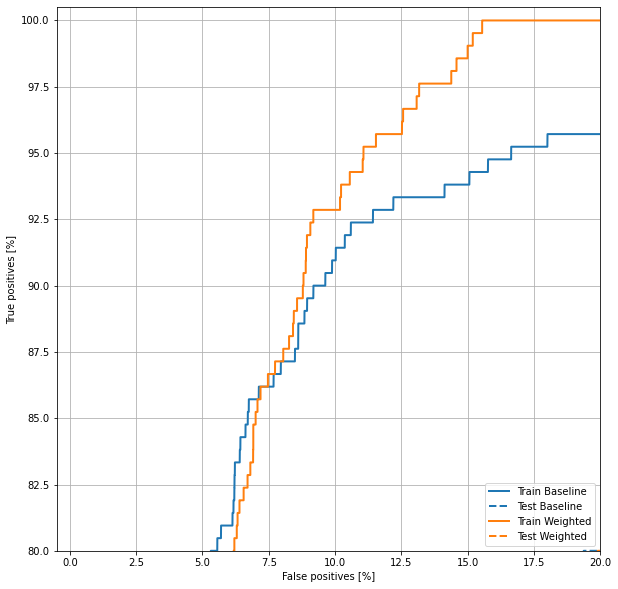

In [48]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

# 오버샘플링

### 소수 계급 과대 표본

In [49]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

### NumPy 사용 

In [50]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(1177546, 28)

In [51]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(2355092, 28)

#### `tf.data` 사용

`tf.data` 사용하는 경우 균형 잡힌 예제를 생성하는 가장 쉬운 방법은 `positive` 그리고 `negative` 데이터 세트로 시작하여 병합하는 것입니다. 더 많은 예는 [tf.data guide](../../guide/data.ipynb) 를 참조하세요.

In [52]:
BUFFER_SIZE = 100000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

각 데이터 세트는 `(feature, label)` 쌍을 제공합니다.:

In [53]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [-0.2369431  -0.11217773 -0.20630167 -0.22196209  4.99792509  5.
  3.48697106  0.95724605  0.74573418 -0.1112886  -0.90946246 -0.7002265
 -0.44597733 -0.08712853  1.17284589 -0.67468538  1.34871873  0.72369498
  0.77409413 -0.0559768  -0.43270474 -0.02990606  0.32973973 -0.55573766
 -0.42824218  0.44121816  0.02796751  0.8434465 ]

Label:  1.0


In [54]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [55]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.494140625


이 데이터 세트를 사용하려면 epoch 당 단계 수가 필요합니다.

이 경우 "epoch" 의 정의는 명확하지 않습니다. 각 부정적인 예를 한번 볼 때 필요한 배치 수라고 가정합니다.:

In [56]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

2045.0

# 오버 샘플링 된 데이터에 대한 학습

이제 클래스 가중치를 사용하는 대신 리 샘플링 된 데이터 세트로 모델을 학습하여 이러한 방법이 어떻게 비교되는지 확인하십시오.

참고: 긍정적인 예를 복제하여 데이터가 균형을 이루었기 때문에 총 데이터 세트 크기가 더 크고 각 세대가 더 많은 학습 단계를 위해 실행됩니다. 

In [57]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

c:\users\billk\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
2045/2045 [==============================] - 52s 25ms/step - loss: 0.1856 - tp: 2026788.0000 - fp: 319330.0000 - tn: 2297611.0000 - fn: 67879.0000 - accuracy: 0.9178 - precision: 0.8639 - recall: 0.9676 - auc: 0.9695 - val_loss: 0.1021 - val_tp: 32.0000 - val_fp: 17945.0000 - val_tn: 374582.0000 - val_fn: 27.0000 - val_accuracy: 0.9542 - val_precision: 0.0018 - val_recall: 0.5424 - val_auc: 0.9270
Epoch 2/100
2045/2045 [==============================] - 53s 26ms/step - loss: 0.0767 - tp: 2085015.0000 - fp: 86229.0000 - tn: 2007008.0000 - fn: 9908.0000 - accuracy: 0.9770 - precision: 0.9603 - recall: 0.9953 - auc: 0.9944 - val_loss: 0.0542 - val_tp: 25.0000 - val_fp: 9136.0000 - val_tn: 383391.0000 - val_fn: 34.0000 - val_accuracy: 0.9766 - val_precision: 0.0027 - val_recall: 0.4237 - val_auc: 0.8686000 - accuracy: 0.9762 - prec - ETA: 5s - loss: 0.0787 - tp: 1851904.0000 - fp: 78742.0000 -  - ETA: 2s - loss: 0.0776 - tp: 1972404.0000 - fp: 82629.0000 - tn: 1898
Epoch 3/100


만약 훈련 프로세스가 각 기울기 업데이트에서 전체 데이터 세트를 고려하는 경우, 이 오버 샘플링은 기본적으로 클래스 가중치와 동일합니다. 

그러나 여기에서 한 것처럼 모델을 배치 방식으로 훈련 할 때 오버 샘플링 된 데이터는 더 부드러운 기울기 신호를 제공합니다. 각각의 긍정적인 예가 큰 가중치를 가진 하나의 배치로 표시되는 대신, 그것들은 작은 가중치로 매 회 많은 다른 배치로 보여집니다. 

이 부드러운 기울기 신호는 모델을 더 쉽게 훈련 할 수 있습니다.

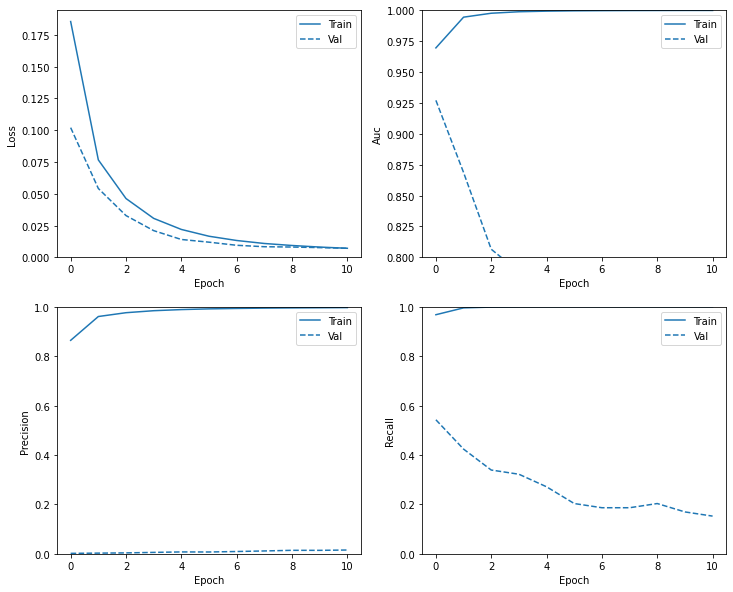

In [58]:
plot_metrics(resampled_history)

precision은 비록 떨어져도 recall 값이 매우 높은 갚으로 나왔다.

### 재교육

균형 잡힌 데이터에 대한 훈련이 더 쉽기 때문에 위의 훈련 절차가 빠르게 과적합 될 수 있습니다. 

따라서 epochs를 분리하여 `callbacks.EarlyStopping`을 제공하십시오. 

In [59]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=10*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Epoch 1/1000
20/20 [==============================] - 4s 126ms/step - loss: 0.6182 - tp: 13162.0000 - fp: 7812.0000 - tn: 405159.0000 - fn: 7413.0000 - accuracy: 0.9649 - precision: 0.6275 - recall: 0.6397 - auc: 0.9834 - val_loss: 0.5903 - val_tp: 46.0000 - val_fp: 110452.0000 - val_tn: 282075.0000 - val_fn: 13.0000 - val_accuracy: 0.7186 - val_precision: 4.1630e-04 - val_recall: 0.7797 - val_auc: 0.8127
Epoch 2/1000
20/20 [==============================] - 2s 85ms/step - loss: 0.5210 - tp: 15194.0000 - fp: 5229.0000 - tn: 15230.0000 - fn: 5307.0000 - accuracy: 0.7428 - precision: 0.7440 - recall: 0.7411 - auc: 0.8246 - val_loss: 0.4927 - val_tp: 45.0000 - val_fp: 92069.0000 - val_tn: 300458.0000 - val_fn: 14.0000 - val_accuracy: 0.7654 - val_precision: 4.8853e-04 - val_recall: 0.7627 - val_auc: 0.8514
Epoch 3/1000
20/20 [==============================] - 2s 82ms/step - loss: 0.4673 - tp: 16873.0000 - fp: 5036.0000 - tn: 15512.0000 - fn: 3539.0000 - accuracy: 0.7906 - precision: 0.770

### 훈련 이력 재확인

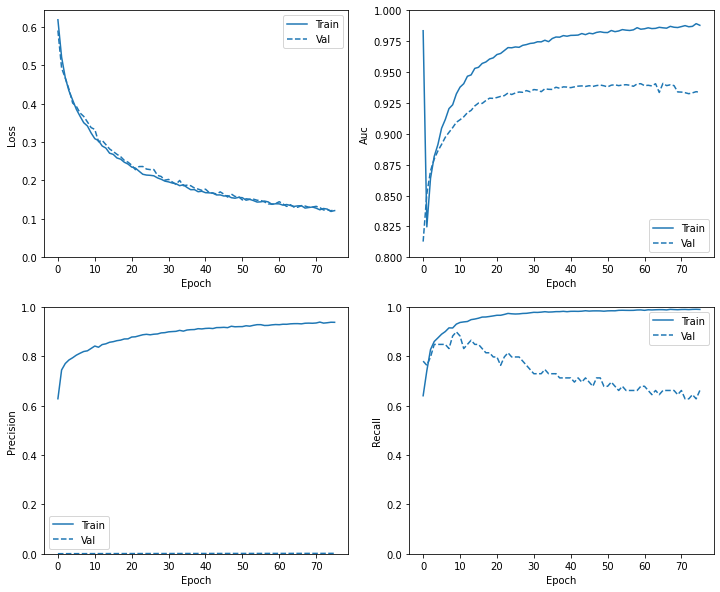

In [60]:
plot_metrics(resampled_history)

재훈련 결과 : precision: 0.9548 - recall: 0.9655 - auc: 0.9874 즉 매우 우수한 성능으로 나타났다.

NameError: name 'train_predictions_resampled' is not defined

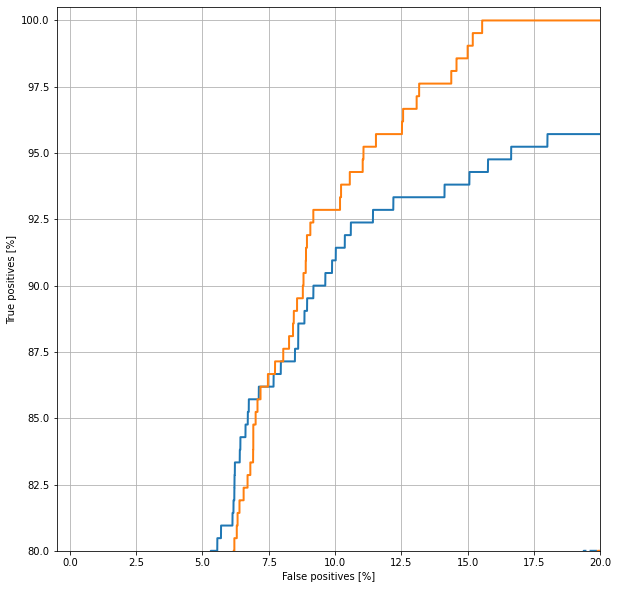

In [61]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')

## 매트릭 평가

In [62]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.1301482617855072
tp :  52.0
fp :  31181.0
tn :  492177.0
fn :  38.0
accuracy :  0.9403589367866516
precision :  0.0016649056924507022
recall :  0.5777778029441833
auc :  0.8941059708595276

Legitimate Transactions Detected (True Negatives):  492177
Legitimate Transactions Incorrectly Detected (False Positives):  31181
Fraudulent Transactions Missed (False Negatives):  38
Fraudulent Transactions Detected (True Positives):  52
Total Fraudulent Transactions:  90


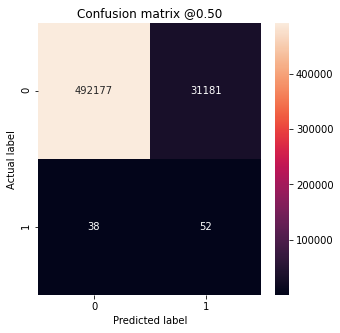

In [63]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)

In [64]:
resampled_model.save('resample_model_day1.h5')

In [65]:
# 가중치와 옵티마이저를 포함하여 정확히 동일한 모델을 다시 생성합니다
new_model = tf.keras.models.load_model('resample_model_day1.h5')

# 모델 구조를 출력합니다
new_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               7424      
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 257       
Total params: 7,681
Trainable params: 7,681
Non-trainable params: 0
_________________________________________________________________


### ROC 그래프 비교 
Train Baseline  vs Train Weighted vs Train Resampled

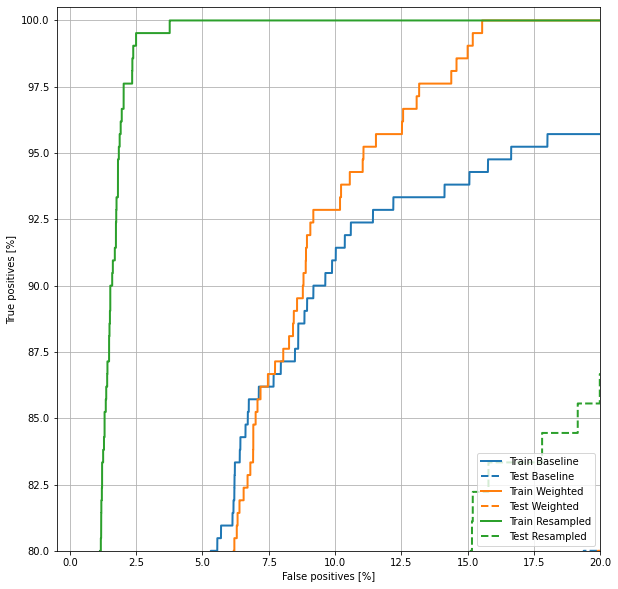

In [66]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')

# 2일 후 예측

In [ ]:
#분석을 위해 음수 값을 가지는 칼럼들을 제외하고 결측치를 0으로 대체한다.
select_df_2 = raw_df[['mi10MaxRn', 'hr1MaxRn', 'sumRnDur', 'sumRn', 'maxInsWs', 'maxWs', 'avgWs','minRhm','avgRhm','n99Rn', 'PRRCK_LARG', 'PRRCK_MDDL','LOCTN_ALTT','LOCTN_GRDN','CLZN_CD','TPGRP_TPCD','PRDN_FOM_C','SLANT_TYP','SLDPT_TPCD','SCSTX_CD','SLTP_CD','STORUNST','FROR_CD','FRTP_CD','KOFTR_GROU','DMCLS_CD','AGCLS_CD','HEIGHT','2day_yn']]
cleaned_df_2 = select_df_2.fillna(0)
cleaned_df_2.info()
cleaned_df_2.head()

In [ ]:
y = cleaned_df_2['2day_yn']
X = cleaned_df_2.drop('2day_yn', axis =1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)
# print(X_train.shape, X_test.shape)
from imblearn.under_sampling import RandomUnderSampler

# 1: 50 비율
X_samp, y_samp = RandomUnderSampler(random_state=1024, sampling_strategy={1: 359, 0: 17950}).fit_resample(X, y)
X_df = pd.DataFrame(X_samp)
y_df = pd.DataFrame(y_samp)

df_samp = pd.concat([X_df, y_df], axis=1)

In [ ]:
# 데이터 스플릿, 셔플링
train_df_2, test_df_2 = train_test_split(df_samp, test_size=0.25)
train_df_2, val_df_2 = train_test_split(train_df_2, test_size=0.25)

#label(변수들), feature(landslide)를 np array 형태로 변환
train_labels_2 = np.array(train_df_2.pop('2day_yn'))
bool_train_labels_2 = train_labels_2 != 0
val_labels_2 = np.array(val_df_2.pop('2day_yn'))
test_labels_2 = np.array(test_df_2.pop('2day_yn'))

train_features_2 = np.array(train_df_2)
val_features_2 = np.array(val_df_2)
test_features_2 = np.array(test_df_2)

In [ ]:
# sklearn StandardScaler를 사용하여 입력 기능을 정규화
scaler = StandardScaler()
train_features_2 = scaler.fit_transform(train_features_2)

val_features_2 = scaler.transform(val_features_2)
test_features_2 = scaler.transform(test_features_2)

train_features = np.clip(train_features_2, -5, 5)
val_features_2 = np.clip(val_features_2, -5, 5)
test_features_2 = np.clip(test_features_2, -5, 5)


print('Training labels shape:', train_labels_2.shape)
print('Validation labels shape:', val_labels_2.shape)
print('Test labels shape:', test_labels_2.shape)

print('Training features shape:', train_features_2.shape)
print('Validation features shape:', val_features_2.shape)
print('Test features shape:', test_features_2.shape)


In [ ]:
pos_features_2 = train_features_2[bool_train_labels_2]
neg_features_2 = train_features_2[~bool_train_labels_2]

pos_labels_2 = train_labels_2[bool_train_labels_2]
neg_labels_2 = train_labels_2[~bool_train_labels_2]

In [ ]:
ids = np.arange(len(pos_features_2))
choices_2 = np.random.choice(ids, len(neg_features_2))

res_pos_features_2 = pos_features_2[choices_2]
res_pos_labels_2 = pos_labels_2[choices_2]

res_pos_features_2.shape

In [ ]:
resampled_features_2 = np.concatenate([res_pos_features_2, neg_features_2], axis=0)
resampled_labels_2 = np.concatenate([res_pos_labels_2, neg_labels_2], axis=0)

order_2 = np.arange(len(resampled_labels_2))
np.random.shuffle(order_2)
resampled_features_2 = resampled_features_2[order_2]
resampled_labels_2 = resampled_labels_2[order_2]

resampled_features_2.shape

In [ ]:
BUFFER_SIZE = 100000

def make_ds(features_2, labels_2):
  ds = tf.data.Dataset.from_tensor_slices((features_2, labels_2))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds_2 = make_ds(pos_features_2, pos_labels_2)
neg_ds_2 = make_ds(neg_features_2, neg_labels_2)

In [ ]:
for features_2, label_2 in pos_ds_2.take(1):
  print("Features:\n", features_2.numpy())
  print()
  print("Label: ", label_2.numpy())

In [ ]:
for features_2, label_2 in pos_ds_2.take(1):
  print("Features:\n", features_2.numpy())
  print()
  print("Label: ", label_2.numpy())

In [ ]:
resampled_ds_2 = tf.data.experimental.sample_from_datasets([pos_ds_2, neg_ds_2], weights=[0.5, 0.5])
resampled_ds_2 = resampled_ds_2.batch(BATCH_SIZE).prefetch(2)

In [ ]:
for features, label in resampled_ds_2.take(1):
  print(label.numpy().mean())

In [ ]:
resampled_model_2 = make_model()
resampled_model_2.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer_2 = resampled_model_2.layers[-1] 
output_layer_2.bias.assign([0])

val_ds_2 = tf.data.Dataset.from_tensor_slices((val_features_2, val_labels_2)).cache()
val_ds_2 = val_ds_2.batch(BATCH_SIZE).prefetch(2) 

resampled_2_history = resampled_model_2.fit(
    resampled_ds_2,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds_2)

In [ ]:
resampled_model_2 = make_model()
resampled_model_2.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer_2 = resampled_model_2.layers[-1] 
output_layer_2.bias.assign([0])

resampled_2_history = resampled_model_2.fit(
    resampled_ds_2,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=10*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds_2))

In [ ]:
resampled_2_results = resampled_model_2.evaluate(test_features_2, test_labels_2,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model_2.metrics_names, resampled_2_results):
  print(name, ': ', value)
print()

plot_cm(test_labels_2, test_predictions_resampled_2)

# Submission 실행

In [ ]:
# Merged_data_file
Merged_2020 = pd.read_csv('/content/drive/MyDrive/A2W/merge_s_h_a20.csv')
# Test 검증 데이터셋
test_input = pd.read_csv('/content/drive/MyDrive/A2W/input.csv', encoding = 'cp949')

In [ ]:
# 훈련된 모델로 결과 도출 : day1 함수
def day1_data_test(sgg, umd, date):    
    # sgg 데이터와 umd 데이터, date를 통한 추출
    text = sgg + ' ' + umd
    # specific 자체가 학습 돌린 결과 참고해서 input으로 만들어야 됨
    test_day1 = Merged_2020[Merged_2020['umd2'].str.contains(text.rstrip()) & Merged_2020['tm'].str.contains(date)]
    test_specific_day1 = test_day1[['mi10MaxRn', 'hr1MaxRn', 'sumRnDur', 'sumRn', 'maxInsWs', 
                                    'maxWs', 'avgWs','minRhm','avgRhm','n99Rn', 'PRRCK_LARG', 'PRRCK_MDDL','LOCTN_ALTT','LOCTN_GRDN',
                                    'CLZN_CD','TPGRP_TPCD','PRDN_FOM_C','SLDPT_TPCD','SLANT_TYP','SCSTX_CD','SLTP_CD','STORUNST','FROR_CD',
                                    'FRTP_CD','KOFTR_GROU','DMCLS_CD','AGCLS_CD','HEIGHT']]
    fillna_test_specific_day1 = test_specific_day1.fillna(0)
    model_pred =  resampled_model.predict(fillna_test_specific_day1.to_numpy(), batch_size=BATCH_SIZE)
    #model_pred = xgb1.predict(fillna_test_specific_day1.to_numpy())
    return model_pred

# 훈련된 모델로 결과 도출 : day2 함수
def day2_data_test(sgg, umd, date):    
    # sgg 데이터와 umd 데이터, date를 통한 추출
    text = sgg + ' ' + umd
    # specific 자체가 학습 돌린 결과 참고해서 input으로 만들어야 됨
    test_day2 = Merged_2020[Merged_2020['umd2'].str.contains(text.rstrip()) & Merged_2020['tm'].str.contains(date)]
    test_specific_day2 = test_day2[['mi10MaxRn', 'hr1MaxRn', 'sumRnDur', 'sumRn', 'maxInsWs',
                                    'maxWs', 'avgWs','minRhm','avgRhm','n99Rn', 'PRRCK_LARG', 'PRRCK_MDDL','LOCTN_ALTT','LOCTN_GRDN',
                                    'CLZN_CD','TPGRP_TPCD','PRDN_FOM_C','SLDPT_TPCD','SLANT_TYP','SCSTX_CD','SLTP_CD','STORUNST','FROR_CD',
                                    'FRTP_CD','KOFTR_GROU','DMCLS_CD','AGCLS_CD','HEIGHT']]
    fillna_test_specific_day2 = test_specific_day2.fillna(0)
    model_pred = resampled_model_2.predict(fillna_test_specific_day2.to_numpy(),batch_size=BATCH_SIZE)
    #model_pred = xgb2.predict(fillna_test_specific_day2.to_numpy())
    return model_pred

In [ ]:
length_test_input = len(test_input.index)

#day_1 data
for index in range(length_test_input):
    if test_input['umd'][index] == "삼거동":
        input_date = test_input['date'][index]
        input_sgg = test_input['sgg'][index]
        input_umd = "상문동"
    elif test_input['umd'][index] == "어곡동":
        input_date = test_input['date'][index]
        input_sgg = test_input['sgg'][index]
        input_umd = "강서동"
    elif test_input['umd'][index] == "주진동":
        input_date = test_input['date'][index]
        input_sgg = test_input['sgg'][index]
        input_umd = "소주동"
    elif test_input['umd'][index] == "시동":
        input_date = test_input['date'][index]
        input_sgg = test_input['sgg'][index]
        input_umd = "불국동"
    elif test_input['umd'][index] == "덕곡동":
        input_date = test_input['date'][index]
        input_sgg = test_input['sgg'][index]
        input_umd = "지좌동"
    elif test_input['umd'][index] == "조와동":
        input_date = test_input['date'][index]
        input_sgg = test_input['sgg'][index]
        input_umd = "상망동"
    else:
        input_date = test_input['date'][index]
        input_sgg = test_input['sgg'][index]
        input_umd = test_input['umd'][index]
    test_input['1day_yn'][index] = day1_data_test(input_sgg, input_umd, input_date)
        

#day_2 data
for index in range(length_test_input):
    if test_input['umd'][index] == "삼거동":
        input_date = test_input['date'][index]
        input_sgg = test_input['sgg'][index]
        input_umd = "상문동"
    elif test_input['umd'][index] == "어곡동":
        input_date = test_input['date'][index]
        input_sgg = test_input['sgg'][index]
        input_umd = "강서동"
    elif test_input['umd'][index] == "주진동":
        input_date = test_input['date'][index]
        input_sgg = test_input['sgg'][index]
        input_umd = "소주동"
    elif test_input['umd'][index] == "시동":
        input_date = test_input['date'][index]
        input_sgg = test_input['sgg'][index]
        input_umd = "불국동"
    elif test_input['umd'][index] == "덕곡동":
        input_date = test_input['date'][index]
        input_sgg = test_input['sgg'][index]
        input_umd = "지좌동"
    elif test_input['umd'][index] == "조와동":
        input_date = test_input['date'][index]
        input_sgg = test_input['sgg'][index]
        input_umd = "상망동"
    else:
        input_date = test_input['date'][index]
        input_sgg = test_input['sgg'][index]
        input_umd = test_input['umd'][index]
    test_input['2day_yn'][index] = day2_data_test(input_sgg, input_umd, input_date)


test_input.head()

In [ ]:
test_input["1day_yn"].value_counts()

In [ ]:
test_input["2day_yn"].value_counts()

In [ ]:
test_input.to_csv("DNN_over_model.csv", index=False, encoding='cp949')